In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv("data_runs.csv")
df

,Unnamed: 0,Team,Time,Toss,Pitch,Total_Runs,Wickets,Avg_RR,PP_Runs,PP_RR
0,0,6.0,4.0,2.0,2.0,210.0,7.0,9.706313,58.0,9.666667
1,1,3.0,5.0,2.0,1.0,121.0,5.0,6.319023,48.0,8.000000
2,2,9.0,1.0,1.0,1.0,123.0,3.0,7.197588,47.0,7.833333
3,3,4.0,2.0,1.0,2.0,120.0,4.0,5.751232,35.0,5.833333
4,4,5.0,4.0,2.0,2.0,176.0,7.0,8.248727,55.0,9.166667
...,...,...,...,...,...,...,...,...,...,...
9995,9995,2.0,1.0,1.0,1.0,152.0,0.0,7.799016,46.0,7.666667
9996,9996,6.0,2.0,2.0,1.0,158.0,1.0,7.662622,49.0,8.166667
9997,9997,1.0,1.0,2.0,2.0,108.0,4.0,6.602061,41.0,6.833333
9998,9998,4.0,3.0,1.0,1.0,147.0,3.0,6.465573,52.0,8.666667


In [ ]:
df['Avg_RR'].min()

1.0749819406138648

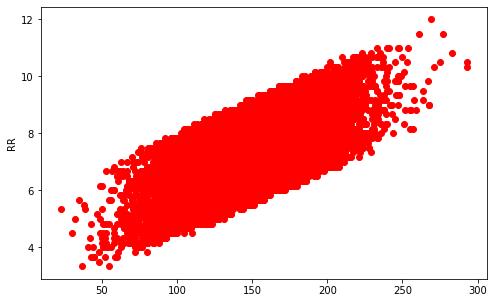

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Total_Runs"].values, df["PP_RR"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('RR')
plt.show()

In [ ]:
cdf = df[['Team','Time','Toss','Pitch','Wickets','Avg_RR','PP_Runs','PP_RR','Total_Runs']]
cdf

,Team,Time,Toss,Pitch,Wickets,Avg_RR,PP_Runs,PP_RR,Total_Runs
0,6.0,4.0,2.0,2.0,7.0,9.706313,58.0,9.666667,210.0
1,3.0,5.0,2.0,1.0,5.0,6.319023,48.0,8.000000,121.0
2,9.0,1.0,1.0,1.0,3.0,7.197588,47.0,7.833333,123.0
3,4.0,2.0,1.0,2.0,4.0,5.751232,35.0,5.833333,120.0
4,5.0,4.0,2.0,2.0,7.0,8.248727,55.0,9.166667,176.0
...,...,...,...,...,...,...,...,...,...
9995,2.0,1.0,1.0,1.0,0.0,7.799016,46.0,7.666667,152.0
9996,6.0,2.0,2.0,1.0,1.0,7.662622,49.0,8.166667,158.0
9997,1.0,1.0,2.0,2.0,4.0,6.602061,41.0,6.833333,108.0
9998,4.0,3.0,1.0,1.0,3.0,6.465573,52.0,8.666667,147.0


In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Team','Time','Toss','Pitch','Wickets','Avg_RR','PP_Runs','PP_RR']])
train_y = np.asanyarray(train[['Total_Runs']])


test_x = np.asanyarray(test[['Team','Time','Toss','Pitch','Wickets','Avg_RR','PP_Runs','PP_RR']])
test_y = np.asanyarray(test[['Total_Runs']])


train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)
                      
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

In [ ]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[-2.98557837e+08 -3.13805981e-01  1.16494641e-01  2.22636124e+09
   9.33430973e-02 -1.89937149e-02  3.01505626e+01  1.01951576e+14
  -1.01951576e+14  2.52254353e-01 -9.44110007e-02  3.71705402e-02
   1.99161856e-01 -1.36156272e-01  1.25310081e-01  3.94164918e+13
  -3.94164918e+13 -1.67284335e-01  2.71700373e-01 -4.22966112e-02
   3.19420299e-01 -2.52602110e-01  1.27037188e+14 -1.27037188e+14
  -1.38760457e+11  1.22957392e-01 -1.30204548e-01  8.80801750e-02
   3.19912216e+13 -3.19912216e+13  1.67470253e-03  6.49700267e-02
  -2.66329866e-01  9.78541591e+12 -9.78541591e+12 -3.44096574e-01
   3.63748180e-01  8.30278224e+13 -8.30278224e+13  4.01211088e-01
  -3.02431185e+13  3.02431185e+13 -6.70880251e+13  9.40950606e+11
   6.61470745e+13]]
Intercept:  [1.39059015e+11]


In [ ]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error: 9.89
Residual sum of squares (MSE): 154.81
R2-score: 0.86


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Team','Time','Toss','Pitch','Wickets','Avg_RR','PP_Runs','PP_RR']])
train_x = sc.fit_transform(train_x)
train_y = np.asanyarray(train[['Total_Runs']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-3.15012556e-01  1.03828745e-01 -1.70993265e-01  1.52635679e-01
  -9.35512099e-02  3.01255014e+01  2.41571316e+14 -2.41571316e+14]]
Intercept:  [149.44171159]


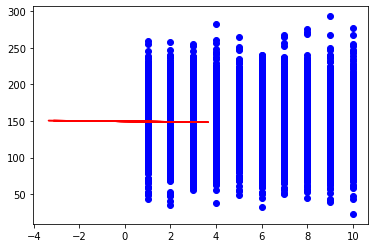

In [ ]:
plt.scatter(train.Team, train.Total_Runs,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Team','Time','Toss','Pitch','Wickets','Avg_RR','PP_Runs','PP_RR']])
test_x = sc.transform(test_x)
test_y = np.asanyarray(test[['Total_Runs']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 9.90
Residual sum of squares (MSE): 155.11
R2-score: 0.86


In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_features=None)
train_x = np.asanyarray(train[['Team','Time','Toss','Pitch','Wickets','Avg_RR','PP_Runs','PP_RR']])
train_x = sc.fit_transform(train_x)
train_y = np.asanyarray(train[['Total_Runs']])
reg.fit(train_x,train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Coefficients:  [[-3.15012556e-01  1.03828745e-01 -1.70993265e-01  1.52635679e-01
  -9.35512099e-02  3.01255014e+01  2.41571316e+14 -2.41571316e+14]]
Intercept:  [149.44171159]


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Team','Time','Toss','Pitch','Wickets','Avg_RR','PP_Runs','PP_RR']])
test_x = sc.transform(test_x)
test_y = np.asanyarray(test[['Total_Runs']])
test_y_hat = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 39.13
Residual sum of squares (MSE): 2400.44
R2-score: 0.85
